In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
name_basics = pd.read_csv("/mnt/c/Users/donov/Bureau/IMDB/data/raw/name.basics.tsv", sep="\t", na_values='\\N', nrows = 1)
title_akas = pd.read_csv("/mnt/c/Users/donov/Bureau/IMDB/data/raw/title.akas.tsv", sep="\t", na_values='\\N', nrows= 1 )
title_basics = pd.read_csv("/mnt/c/Users/donov/Bureau/IMDB/data/raw/title.basics.tsv", sep="\t", na_values='\\N', low_memory=False)
title_principals = pd.read_csv("/mnt/c/Users/donov/Bureau/IMDB/data/raw/title.principals.tsv", sep="\t", na_values='\\N', nrows = 1)
title_ratings = pd.read_csv("/mnt/c/Users/donov/Bureau/IMDB/data/raw/title.ratings.tsv", sep="\t", na_values='\\N', low_memory=False)


In [3]:
# Création d'un dictionnaire pour stocker les DataFrames
dfs = {
    "name_basics": name_basics,
    "title_akas": title_akas,
    "title_basics": title_basics,
    "title_principals": title_principals,
    "title_ratings": title_ratings
}   

In [4]:
#title_basics = title_basics.dropna(subset = ['startYear'])
#print(title_basics['startYear'].sort_values())

In [5]:
# Première visualisation des données
print("Première visualisation des données\n")


for name, df in dfs.items():
    print(f"DataFrame: {name}")

# Affichage des 5 premières lignes de chaque DataFrame
    print(df.head(), "\n")

# Affichage des informations sur chaque DataFrame
    print(df.info(), "\n")

# Affichage des statistiques descriptives de chaque DataFrame
    print(df.describe(include='all'), "\n")


Première visualisation des données

DataFrame: name_basics
      nconst   primaryName  birthYear  deathYear  \
0  nm0000001  Fred Astaire       1899       1987   

              primaryProfession                           knownForTitles  
0  actor,miscellaneous,producer  tt0072308,tt0050419,tt0027125,tt0025164   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nconst             1 non-null      object
 1   primaryName        1 non-null      object
 2   birthYear          1 non-null      int64 
 3   deathYear          1 non-null      int64 
 4   primaryProfession  1 non-null      object
 5   knownForTitles     1 non-null      object
dtypes: int64(2), object(4)
memory usage: 180.0+ bytes
None 

           nconst   primaryName  birthYear  deathYear  \
count           1             1        1.0        1.0   
unique          1             1 

In [6]:
# Nettoyage de données 

for name, df in dfs.items():

    # Verification des valeurs manquantes et des doublons dans chaque DataFrame
    print(f"DataFrame: {name}")
    print(f"Valeurs NaN:\n{df.isnull().sum()}")
    print(f"Doublons:{df.duplicated().sum()}")


    # Suppression des doublons
    df.drop_duplicates(inplace=True)
    
    # Suppression des lignes où toutes les valeurs sont NaN
    df.dropna(how='all', inplace=True)

    # Suppression de colonnes inutiles
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
        
    if 'index' in df.columns:
        df.drop(columns=['index'], inplace=True)

    # Suppression des lignes avec des valeurs NaN dans les colonnes essentielles
    essential_columns = ['nconst', 'tconst', 'titleId', 'primaryName', 'primaryTitle', 'originalTitle']
    existing_essential_cols = [col for col in essential_columns if col in df.columns]

    print(f"Colonnes essentielles utilisées dans {name} : {existing_essential_cols}")

    if existing_essential_cols:  # On vérifie qu'il y a au moins une colonne à utiliser
        df.dropna(subset=existing_essential_cols, inplace=True)

    #conversion des dates si startYear et endYear sont des colonnes de la table  
    if 'startYear' in df.columns:
        df['startYear'] = pd.to_numeric(df['startYear'], errors='coerce')

    if 'endYear' in df.columns:
        df['endYear'] = pd.to_numeric(df['endYear'], errors='coerce')

    # Réinitialisation de l'index
    df.reset_index(drop=True, inplace=True)

    # Enregistrement des DataFrames nettoyés dans le dictionnaire
    dfs[name] = df

# Seconde Visualisation apres nettoyage


# Valeurs manquantes et doublons apres nettoyage    
    print(f"Valeurs NaN:\n{df.isnull().sum()}")
    print(f"Doublons:{df.duplicated().sum()}")

# Affichage des 5 premières lignes de chaque DataFrame
    print(df.head(), "\n")

# Affichage des informations sur chaque DataFrame
    print(df.info(), "\n")

# Affichage des statistiques descriptives de chaque DataFrame
    print(df.describe(include='all'), "\n")

DataFrame: name_basics
Valeurs NaN:
nconst               0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64
Doublons:0
Colonnes essentielles utilisées dans name_basics : ['nconst', 'primaryName']
Valeurs NaN:
nconst               0
primaryName          0
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64
Doublons:0
      nconst   primaryName  birthYear  deathYear  \
0  nm0000001  Fred Astaire       1899       1987   

              primaryProfession                           knownForTitles  
0  actor,miscellaneous,producer  tt0072308,tt0050419,tt0027125,tt0025164   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nconst             1 non-null      object
 1   primaryName        1 non-null      object
 2   

In [7]:
### VISUALISATION : DISTRIBUTION DES DIFFERENTS TYPES (FILMS, SERIES, ETC...)

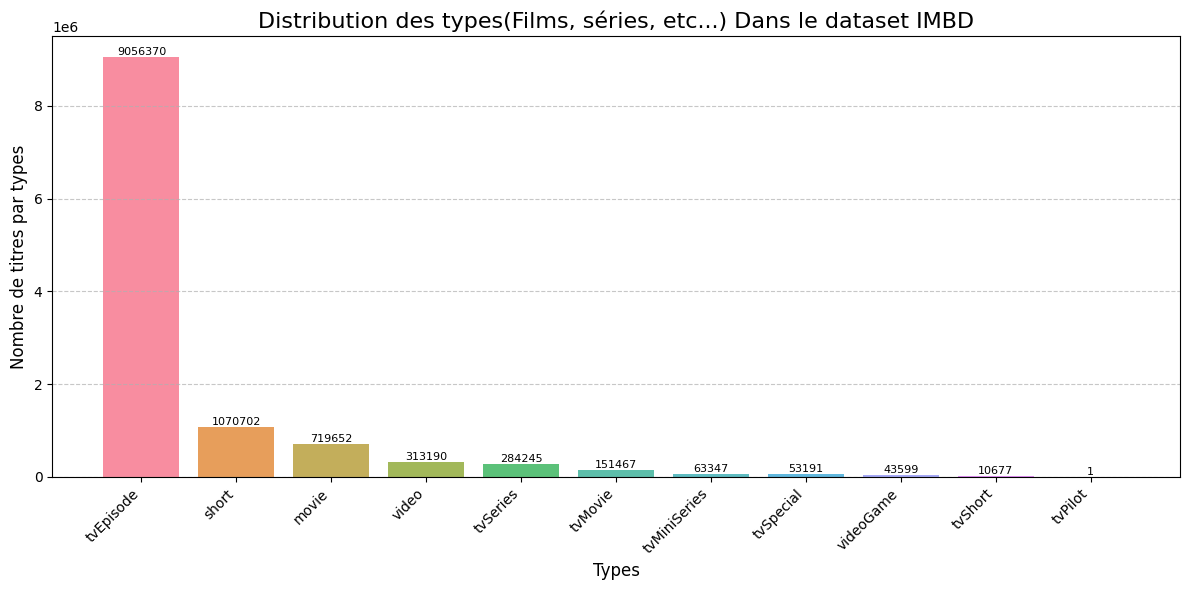

In [8]:
# Groupby par types 
title_basics.head()
#sur toute la durée
type_distrib = title_basics.groupby('titleType').size().reset_index(name='nb_types')
type_distrib = type_distrib.sort_values('nb_types', ascending=False)

plt.figure(figsize=(12,6))
colors = sns.color_palette('husl', len(type_distrib))
bars = plt.bar(type_distrib['titleType'], type_distrib['nb_types'], color=colors, alpha=0.8)
plt.title("Distribution des types(Films, séries, etc...) Dans le dataset IMBD", fontsize=16)
plt.xlabel("Types", fontsize=12)
plt.ylabel("Nombre de titres par types", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(type_distrib['nb_types']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=8)

plt.savefig("/mnt/c/Users/donov/Bureau/IMDB/outputs/Distribution types.png")
plt.tight_layout()
plt.show()



In [9]:
### VISUALISATION : NOMBRES DE TITRES REALISES AU FIL DES ANNEES PUIS A PARTIR DES ANNEES 2000

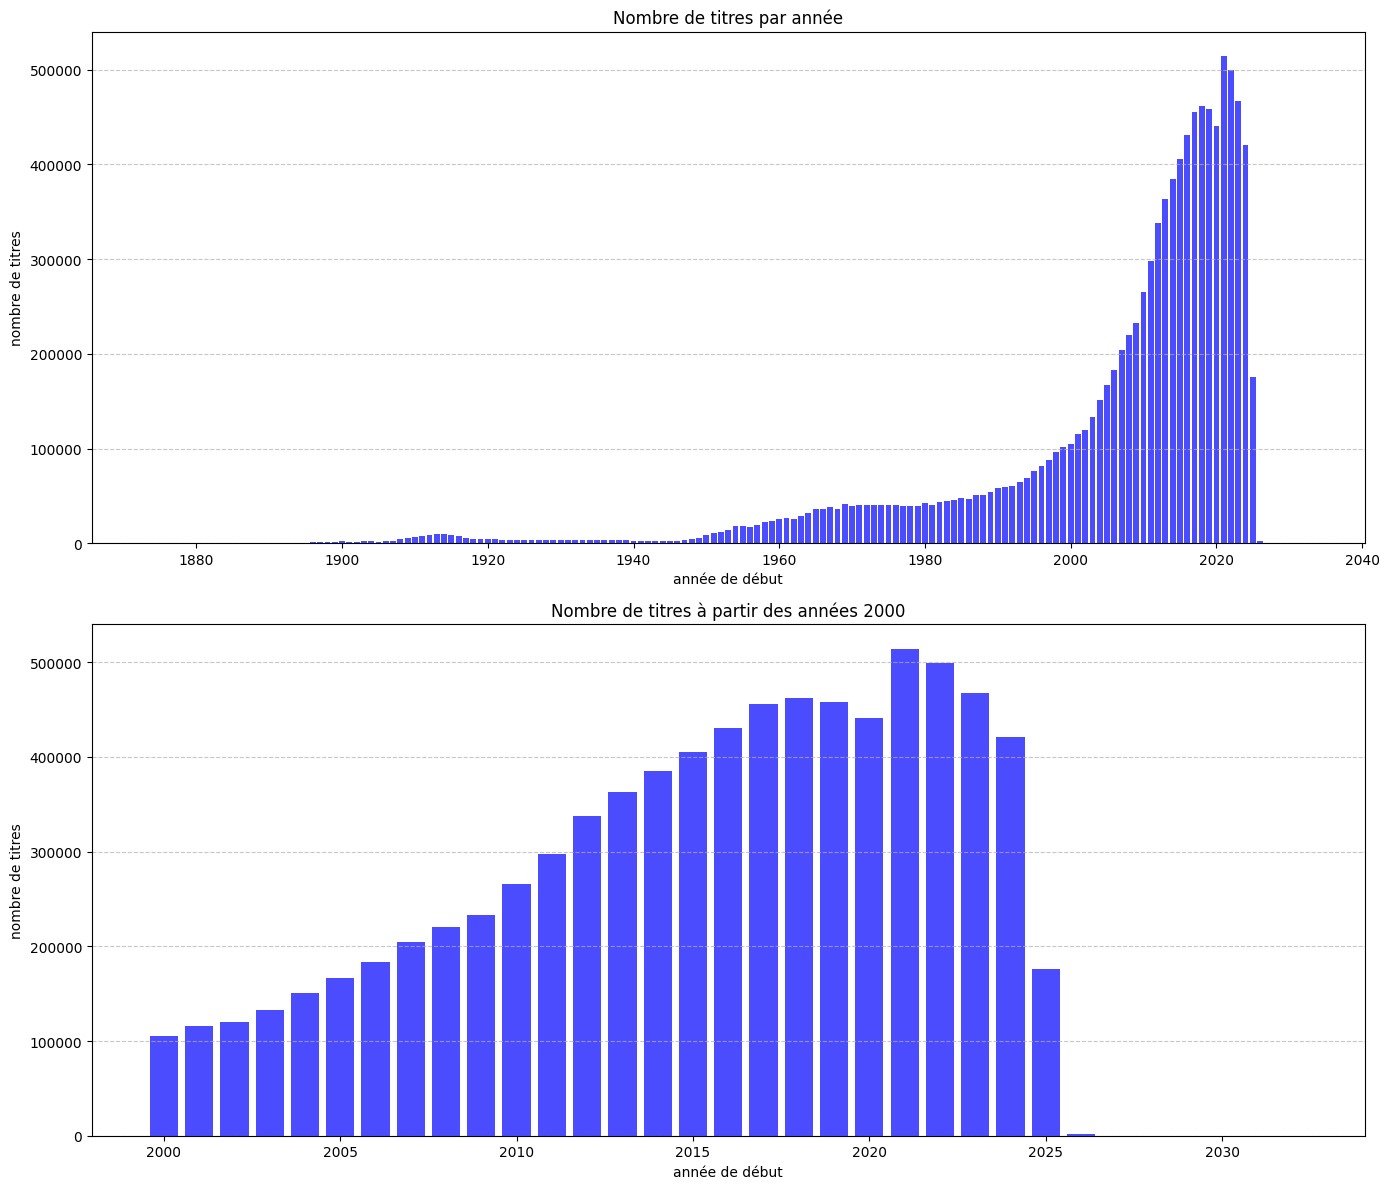

In [10]:
# Groupby par année de début

#sur toute la durée
titles_per_year = title_basics.groupby('startYear').size().reset_index(name='nb_titles')

# Création du graphique
plt.figure(figsize=(14, 12))

# Sur toute la période
plt.subplot(2,1,1)
plt.bar(titles_per_year['startYear'], titles_per_year['nb_titles'] , color='blue', alpha=0.7)
plt.title("Nombre de titres par année")
plt.xlabel("année de début")
plt.ylabel("nombre de titres")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# A partir de 2000
title_basics2K = title_basics[title_basics['startYear'] >= 2000]
titles_per_year2K = title_basics2K.groupby('startYear').size().reset_index(name='nb_titles')

plt.subplot(2,1,2)
plt.bar(titles_per_year2K['startYear'], titles_per_year2K['nb_titles'] , color='blue', alpha=0.7)
plt.title("Nombre de titres à partir des années 2000")
plt.xlabel("année de début")
plt.ylabel("nombre de titres")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("/mnt/c/Users/donov/Bureau/IMDB/outputs/titres_par_années.png")
plt.tight_layout()
plt.show()



In [11]:
### VISUALISATION : DISTRIBUTION DES TITRES EN FONCTION DU RUNNING TIME

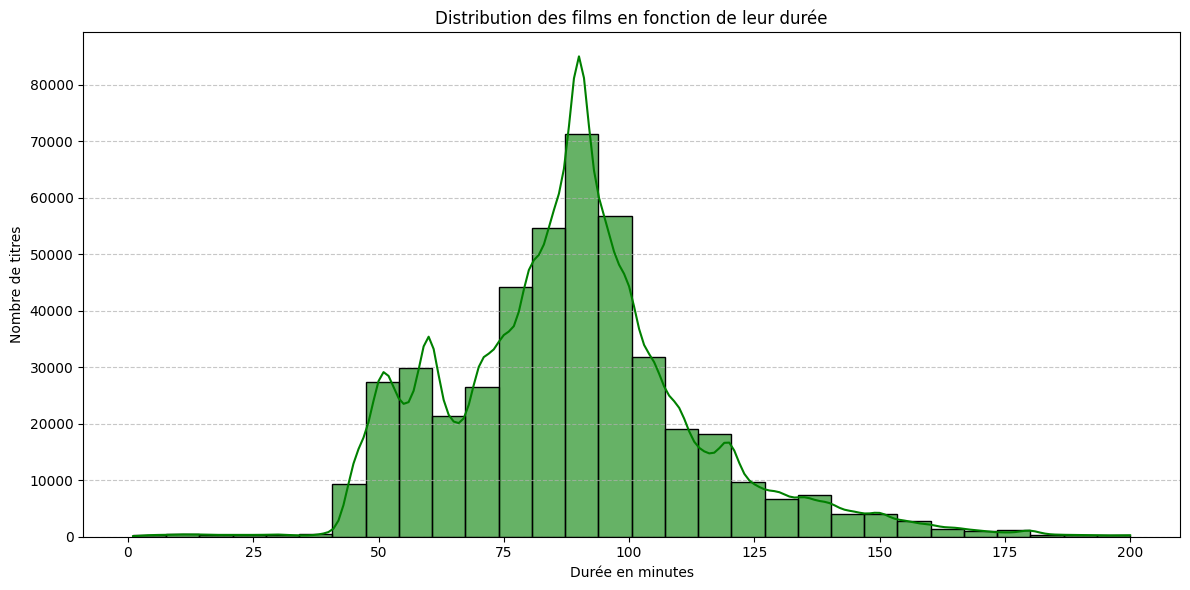

In [12]:
# Filtrage des films dans le dataset
title_basicsM = title_basics[title_basics['titleType'] == 'movie']

data = title_basicsM['runtimeMinutes'].dropna().astype(float)
data = data[(data > 0) & (data <= 200)]  # Filtre des valeurs aberrantes

plt.figure(figsize=(12, 6))
sns.histplot(data, bins=30, kde=True, color='green', alpha=0.6)
plt.title("Distribution des films en fonction de leur durée")
plt.xlabel("Durée en minutes")
plt.ylabel("Nombre de titres")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig("/mnt/c/Users/donov/Bureau/IMDB/outputs/distribution_temps_total_film.png")
plt.tight_layout()
plt.show()



In [13]:
### VISUALISATION : GENRES DE FILMS LES PLUS REGARDES DANS LE MONDE 

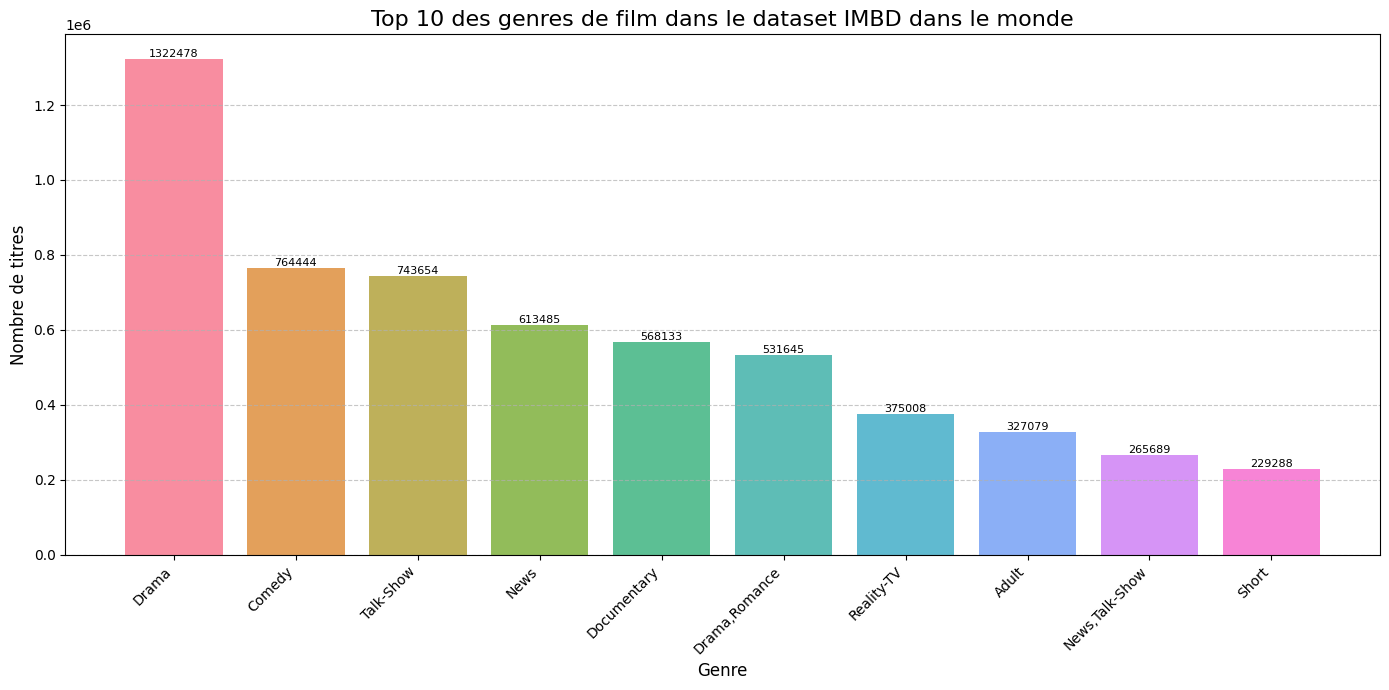

In [14]:
# Visualisation du top 10 des genres de film les plus regardés

genre_distrib = title_basics.groupby('genres').size().reset_index(name='distrib')
genre_distrib = genre_distrib.sort_values('distrib', ascending=False).head(10)


plt.figure(figsize=(14, 7))
colors = sns.color_palette('husl', len(genre_distrib))
bars = plt.bar(genre_distrib['genres'], genre_distrib['distrib'], color=colors, alpha=0.8)
plt.title("Top 10 des genres de film dans le dataset IMBD dans le monde", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de titres", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(genre_distrib['distrib']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=8)

plt.savefig("/mnt/c/Users/donov/Bureau/IMDB/outputs/Top_10_genres_de_film.png")
plt.tight_layout()
plt.show()


In [15]:
### VISUALISATION  : GENRES DE FILM LES PLUS REGARDES DANS LES ANNEES 2000 (sur la totalité des data de title_basics) 

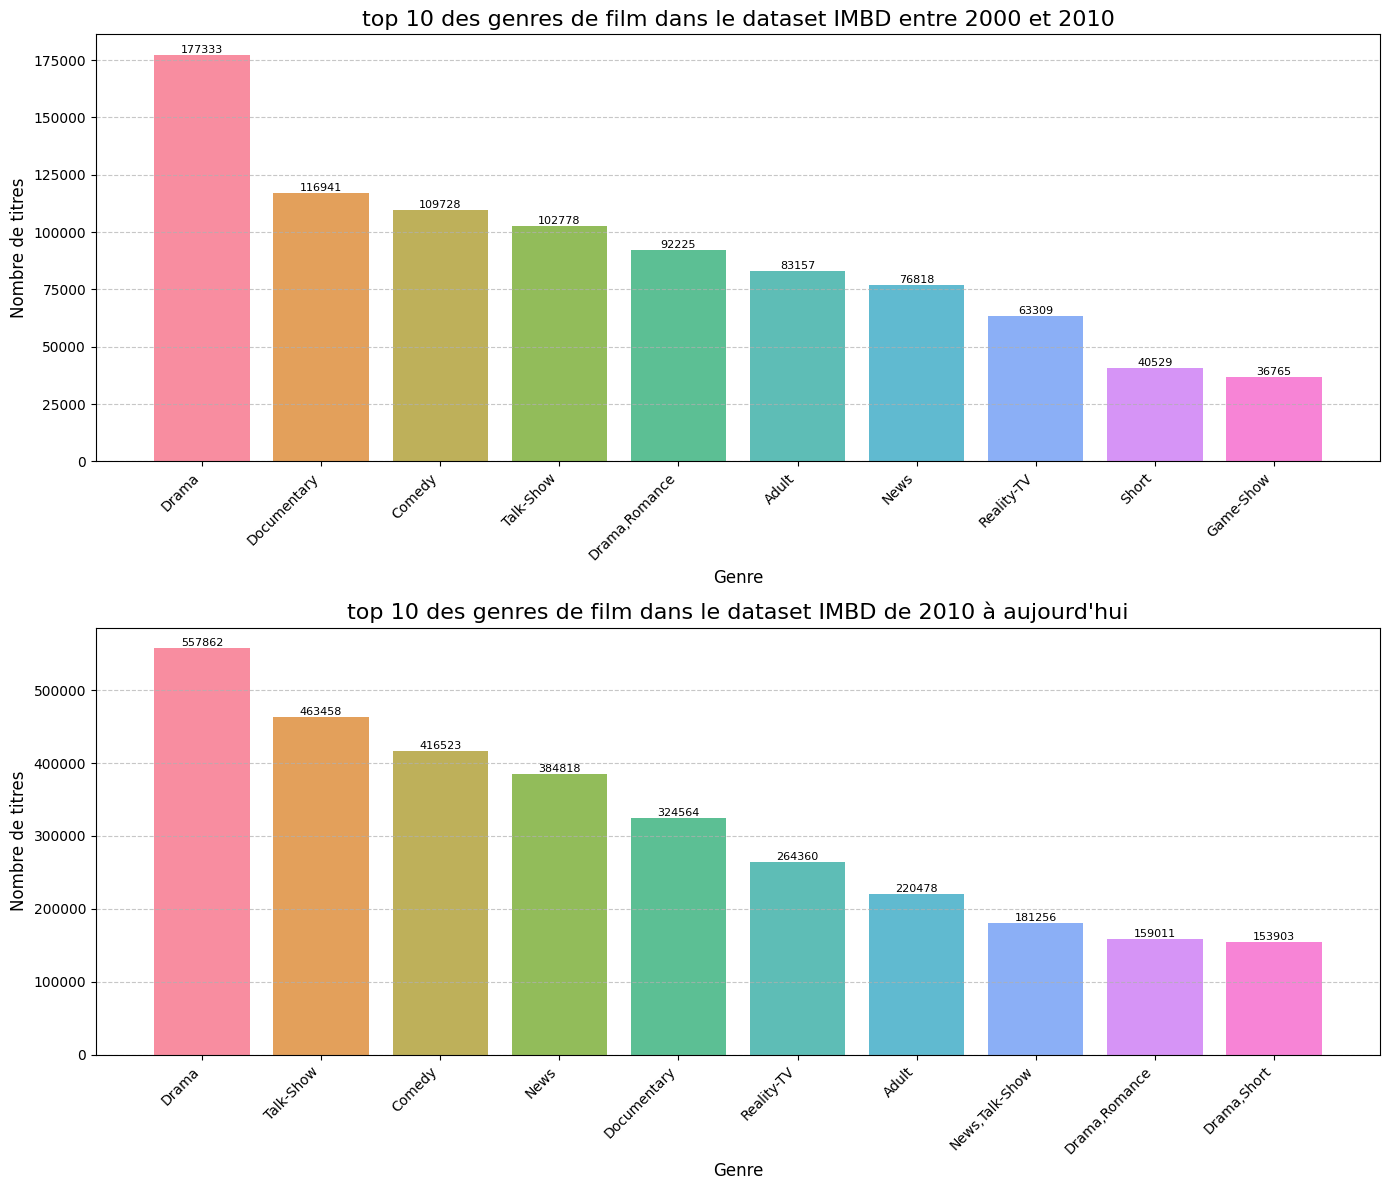

In [16]:
# Visualisation des genres de films les plus regardés entre 2000 et 2010 puis de 2010 à aujourd'hui

# Filtres
title_basics2000 = title_basics[(title_basics['startYear'] >=2000) & (title_basics['startYear'] <= 2010)]
title_basics2010 = title_basics[title_basics['startYear'] > 2010]

genre_distrib1 = title_basics2000.groupby('genres').size().reset_index(name='distrib')
genre_distrib1= genre_distrib1.sort_values('distrib', ascending=False).head(10)

genre_distrib2 = title_basics2010.groupby('genres').size().reset_index(name='distrib')
genre_distrib2= genre_distrib2.sort_values('distrib', ascending=False).head(10)

# Préparation des deux plots
plt.figure(figsize=(14, 12))


# Plot de 2000 a 2010

plt.subplot(2,1,1)
colors1 = sns.color_palette('husl', len(genre_distrib1))
bars1 = plt.bar(genre_distrib1['genres'], genre_distrib1['distrib'], color=colors1, alpha=0.8)
plt.title("top 10 des genres de film dans le dataset IMBD entre 2000 et 2010", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de titres", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(genre_distrib1['distrib']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=8)


# Plot de 2010 à aujourd'hui

plt.subplot(2,1,2)
colors2 = sns.color_palette('husl', len(genre_distrib2))
bars1 = plt.bar(genre_distrib2['genres'], genre_distrib2['distrib'], color=colors2, alpha=0.8)
plt.title("top 10 des genres de film dans le dataset IMBD de 2010 à aujourd'hui", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de titres", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(genre_distrib2['distrib']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=8)

plt.savefig("/mnt/c/Users/donov/Bureau/IMDB/outputs/Top_10_genres_de_film2K.png")
plt.tight_layout()
plt.show()

In [17]:
### GENRE DE FILMS LES MIEUX NOTES 

In [18]:
# Creation du dataset contenant les genres ainsi que les notes
rating_basics = pd.merge(title_basicsM,title_ratings, on = 'tconst', how = 'left')
rating_basics.head()

# Filtre des genres les mieux notés :

#On va dans un premier temps séparer les genres (dans le cas ou il y a plusieurs genres pour un film)
split_genre = rating_basics.assign(genres=rating_basics['genres'].str.split(',')).explode('genres')

# Groupby les genres et des notes de films puis calcul de la moyenne des genres
genre_note = split_genre.groupby('genres')['averageRating'].mean().sort_values(ascending=False)


/tmp/ipykernel_6119/183279760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genre_note.values, y=genre_note.index, palette="coolwarm")


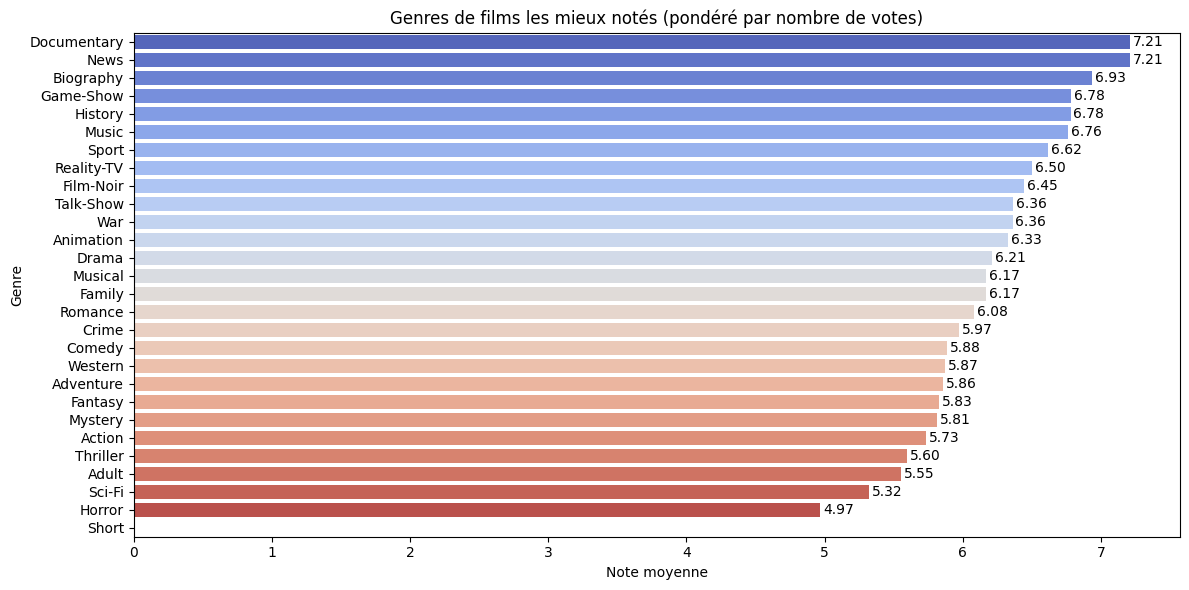

In [19]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x=genre_note.values, y=genre_note.index, palette="coolwarm")
for i, v in enumerate(genre_note.values):
    ax.text(v + 0.02, i, f"{v:.2f}", color='black', va='center')
plt.xlabel("Note moyenne")
plt.ylabel("Genre")
plt.title("Genres de films les mieux notés (pondéré par nombre de votes)")
plt.savefig("/mnt/c/Users/donov/Bureau/IMDB/outputs/Genre de film les mieux notés.png")
plt.tight_layout()
plt.show()


In [20]:
### VISUALISATION : GENRES DE FILM LES PLUS REGARDES EN FRANCE DEPUIS 2000 (à partir de 100 000 datas)

In [ ]:
# Création du dataset des films disponibles en France
# Utilisation des tables titl_akas et title_basics

title_akasFR = title_akas[(title_akas['region'] == 'FR')]
title_akasFR = title_akasFR.rename(columns={'titleId' : 'tconst'})
title_akasFR.head()

# création d'une nouvelle table par jointure LEFT JOIN entre title_basics et title_akas

Ntable = pd.merge(title_basics,title_akasFR, on='tconst', how='left')

Ntable[Ntable['region'] =='FR']

In [ ]:
Ntable2000 = Ntable[(Ntable['startYear'] >=2000) & (Ntable['startYear'] <= 2010)]
Ntable2010 = Ntable[Ntable['startYear'] > 2010]

FR2000 = Ntable2000.groupby('genres').size().reset_index(name='distrib')
FR2000 = FR2000.sort_values('distrib', ascending=False).head(10)

FR2010 = Ntable2010.groupby('genres').size().reset_index(name='distrib')
FR2010= FR2010.sort_values('distrib', ascending=False).head(10)

# Préparation des deux plots
plt.figure(figsize=(14, 12))


# Plot de 2000 a 2010

plt.subplot(2,1,1)
colors1 = sns.color_palette('husl', len(FR2000))
bars1 = plt.bar(FR2000['genres'], FR2000['distrib'], color=colors1, alpha=0.8)
plt.title("top 10 des genres de film en France entre 2000 et 2010", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de titres", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(FR2000['distrib']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=8)


# Plot de 2010 à aujourd'hui

plt.subplot(2,1,2)
colors2 = sns.color_palette('husl', len(FR2010))
bars2 = plt.bar(FR2010['genres'], FR2010['distrib'], color=colors2, alpha=0.8)
plt.title("top 10 des genres de film en France de 2010 à aujourd'hui", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Nombre de titres", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(FR2010['distrib']):
    plt.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=8)

plt.savefig("/mnt/c/Users/donov/Bureau/IMDB/outputs/Genre les plus regardés en france 2k.png")
plt.tight_layout()
plt.show()


In [ ]:
### VISUALISATION : FILMS LES MIEUX NOTES DEPUIS LES ANNEES 2000

In [ ]:
#Filtre des années 2000 et 2010+
rating_basics2k = rating_basics[(rating_basics['startYear'] >=2000) & (rating_basics['startYear'] <= 2010)]
rating_basics2k10 = rating_basics[rating_basics['startYear'] > 2010]

#filtrer les films faisant partis des films les plus votés
min2k = rating_basics2k['numVotes'].quantile(0.75)
min2k10 = rating_basics2k10['numVotes'].quantile(0.75)

rating_basics2k = rating_basics2k[rating_basics2k['numVotes'] > min2k]
rating_basics2k10 = rating_basics2k10[rating_basics2k10['numVotes'] > min2k10]

#selection des 10 films les mieux notés
rating_basics2k = rating_basics2k.sort_values('averageRating', ascending=False).head(10)
rating_basics2k10 = rating_basics2k10.sort_values('averageRating', ascending=False).head(10)


In [ ]:
#Creation du plot en ax 
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(16, 14))

# Plot de 2000 a 2010

colors1 = sns.color_palette('coolwarm', len(rating_basics2k))
bars1 = ax1.bar(rating_basics2k['originalTitle'], rating_basics2k['averageRating'], color=colors1, alpha=0.8)
ax1.set_title("top 10 des films les mieux notés entre 2000 et 2010", fontsize=16)
ax1.set_xlabel("Films", fontsize=12)
ax1.set_ylabel("Note", fontsize=12)
ax1.set_xticks(range(len(rating_basics2k['originalTitle'])))
ax1.set_xticklabels(rating_basics2k['originalTitle'],rotation=45, ha='right', fontsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(rating_basics2k['averageRating']):
    ax1.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)


# Plot de 2010 à aujourd'hui

colors2 = sns.color_palette('coolwarm', len(rating_basics2k10))
bars2 = ax2.bar(rating_basics2k10['originalTitle'], rating_basics2k10['averageRating'], color=colors2, alpha=0.8)
ax2.set_title("top 10 des films les mieux notés de 2010 à aujourd'hui", fontsize=16)
ax2.set_xlabel("Films", fontsize=12)
ax2.set_ylabel("Note", fontsize=12)
ax2.set_xticks(range(len(rating_basics2k10['originalTitle'])))
ax2.set_xticklabels(rating_basics2k10['originalTitle'],rotation=45, ha='right', fontsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(rating_basics2k10['averageRating']):
    ax2.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

plt.savefig("/mnt/c/Users/donov/Bureau/IMDB/outputs/Top_10_notes films2k_et_2k10.png")
plt.tight_layout()
plt.show()